In [48]:
import os
import io
import glob
import numpy as np
from google.cloud import vision
import matplotlib.pyplot as plt
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "credentials.json"

# Label Detection

In [39]:
def detect_labels(path):
    """Detects labels in the file."""

    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
            content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations

    descriptions = [label.description for label in labels]
    confidences = [label.score for label in labels]
    return descriptions, confidences

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
# testing out our function with one image
detect_labels("./data/fake/easy_1_1110.jpg")


(['Forehead',
  'Nose',
  'Eyebrow',
  'Beard',
  'Neck',
  'Jaw',
  'Temple',
  'Ear',
  'Happy',
  'Smile'],
 [0.9846563935279846,
  0.9835830330848694,
  0.9517069458961487,
  0.9060753583908081,
  0.8868306279182434,
  0.8816378116607666,
  0.8747667670249939,
  0.8700465559959412,
  0.8563488721847534,
  0.8312569856643677])

In [54]:
# getting labels and scores from directory of real images
def batch_label_detection(globstr):
    d = {}
    for path in list(glob.glob(globstr)):
        # print(path)
        labels, scores = detect_labels(path)
        for label, score in zip(labels, scores):
            if label not in d.keys():
                d[label] = [score]
            else:
                d[label].append(score)
    return d

easy_fake = batch_label_detection("./data/fake/easy*")
mid_fake = batch_label_detection("./data/fake/mid*")
hard_fake = batch_label_detection("./data/fake/hard*")
real = batch_label_detection("./data/real/*")

In [55]:
print(easy_fake.keys(), mid_fake.keys())

dict_keys(['Forehead', 'Nose', 'Cheek', 'Smile', 'Skin', 'Lip', 'Eyebrow', 'Eyelash', 'Mouth', 'Flash photography', 'Eye', 'Beard', 'Organ', 'Human', 'Jaw', 'Ear', 'Cool', 'Hair', 'Chin', 'Hat', 'Hairstyle', 'Facial expression', 'Face', 'Head', 'Outerwear', 'Plant', 'Shoulder', 'Neck', 'Photograph', 'Light', 'Fireworks', 'People in nature', 'Glasses', 'Vision care', 'Cap', 'Temple', 'Happy', 'Vertebrate', 'Colorfulness', 'Purple', 'Gesture', 'Headgear', 'Violet', 'Knit cap', 'Woolen', 'Lipstick', 'Hand', 'Sculpture', 'Art', 'Wrinkle', 'Moustache', 'Facial hair', 'Fur clothing', 'Textile', 'Human body', 'Fedora', 'Sun hat', 'Eyewear', 'Street fashion']) dict_keys(['Forehead', 'Watch', 'Nose', 'Chin', 'Outerwear', 'Hairstyle', 'Eyebrow', 'Photograph', 'Organ', 'Neck', 'Lip', 'Eyelash', 'Mouth', 'Jaw', 'Gesture', 'Iris', 'Lipstick', 'Wings', 'Face', 'Hair', 'Cheek', 'Smile', 'Eye', 'Skin', 'Human body', 'Shoulder', 'Eye liner', 'Head', 'Makeover', 'Happy', 'Wrinkle', 'Facial hair', 'Moust

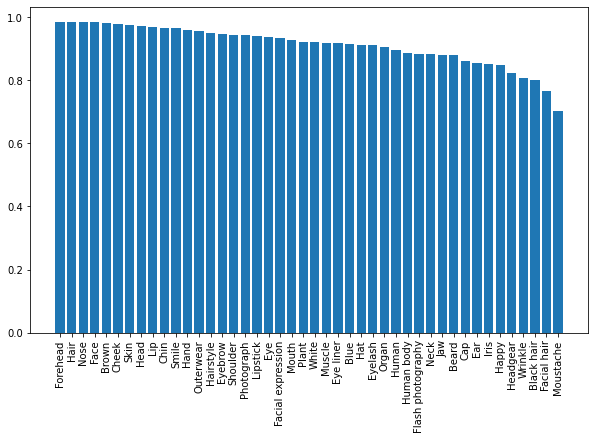

In [67]:
def plot_common_labels(d, color=None):
    keys = [key for key in d.keys() if len(d[key]) > 2]
    values = [np.mean(arr) for arr in d.values() if len(arr) > 2]
    labels, scores = [list(tuple) for tuple in zip(*sorted(zip(keys, values), key=lambda x: x[1], reverse=True))]
    plt.bar(labels, scores, color=color)



fig = plt.figure(figsize=(10, 6))
plot_common_labels(real)
plt.xticks(rotation=90)
plt.show()

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  5.,  8., 12., 14.]),
 array([0.96849471, 0.9687243 , 0.9689539 , 0.96918349, 0.96941308,
        0.96964267, 0.96987226, 0.97010185, 0.97033144, 0.97056103,
        0.97079062]),
 <BarContainer object of 10 artists>)

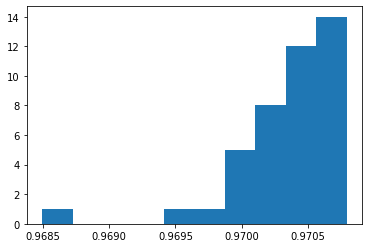

In [27]:
plt.hist(fake_dict['Lip'])